# Mandelbrot-Mengen mit Python und NumPy
In diesem Notebook finden wir die Lösung der Übungsaufgabe zum Thema Mandelbrot-Mengen. Die Aufgabenstellung und die Definition einer Mandelbrot-Menge finden Sie in den Musterlösungen der Übungsaufgabe.

Im ersten Schritt legen wir fest, welchen Bereich der komplexen Zahlenebene wir untersuchen und wie fein das Gitter in diesem Bereich aufgelöst ist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


# Resolution of tour grid in the complex plane
m = 480
n = 320

xmin = -2.0
xmax = 1.0
x = np.linspace(xmin, xmax, num=m).reshape((1, m))
ymin = -1-0
ymax = 1.0
y = np.linspace(ymin, ymax, num=n).reshape((n, 1))
# use tile to build the matrix of c-values
C = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))

Wir bereiten die Berechnung vor. Die Performanz der Berechnungen können wir durch Verändern der Variablen n und divBarrier beeinflussen!

In [2]:
# Z contains the starting value
# we use a logical mask M. In the beginning,
# everything is outside the Mandelbrot set - M = True for all indices.
Z = np.zeros((n, m), dtype=np.complex)
M = np.full((n, m), True, dtype=np.bool)

# maximum number of iterations
n = 100
divBarrier = 2.0

Jetzt führen wir die Iteration durch und erstellen eine Heatmap für die Visualisierung.

Text(0.5, 1.0, 'Mandelbrot-Menge')

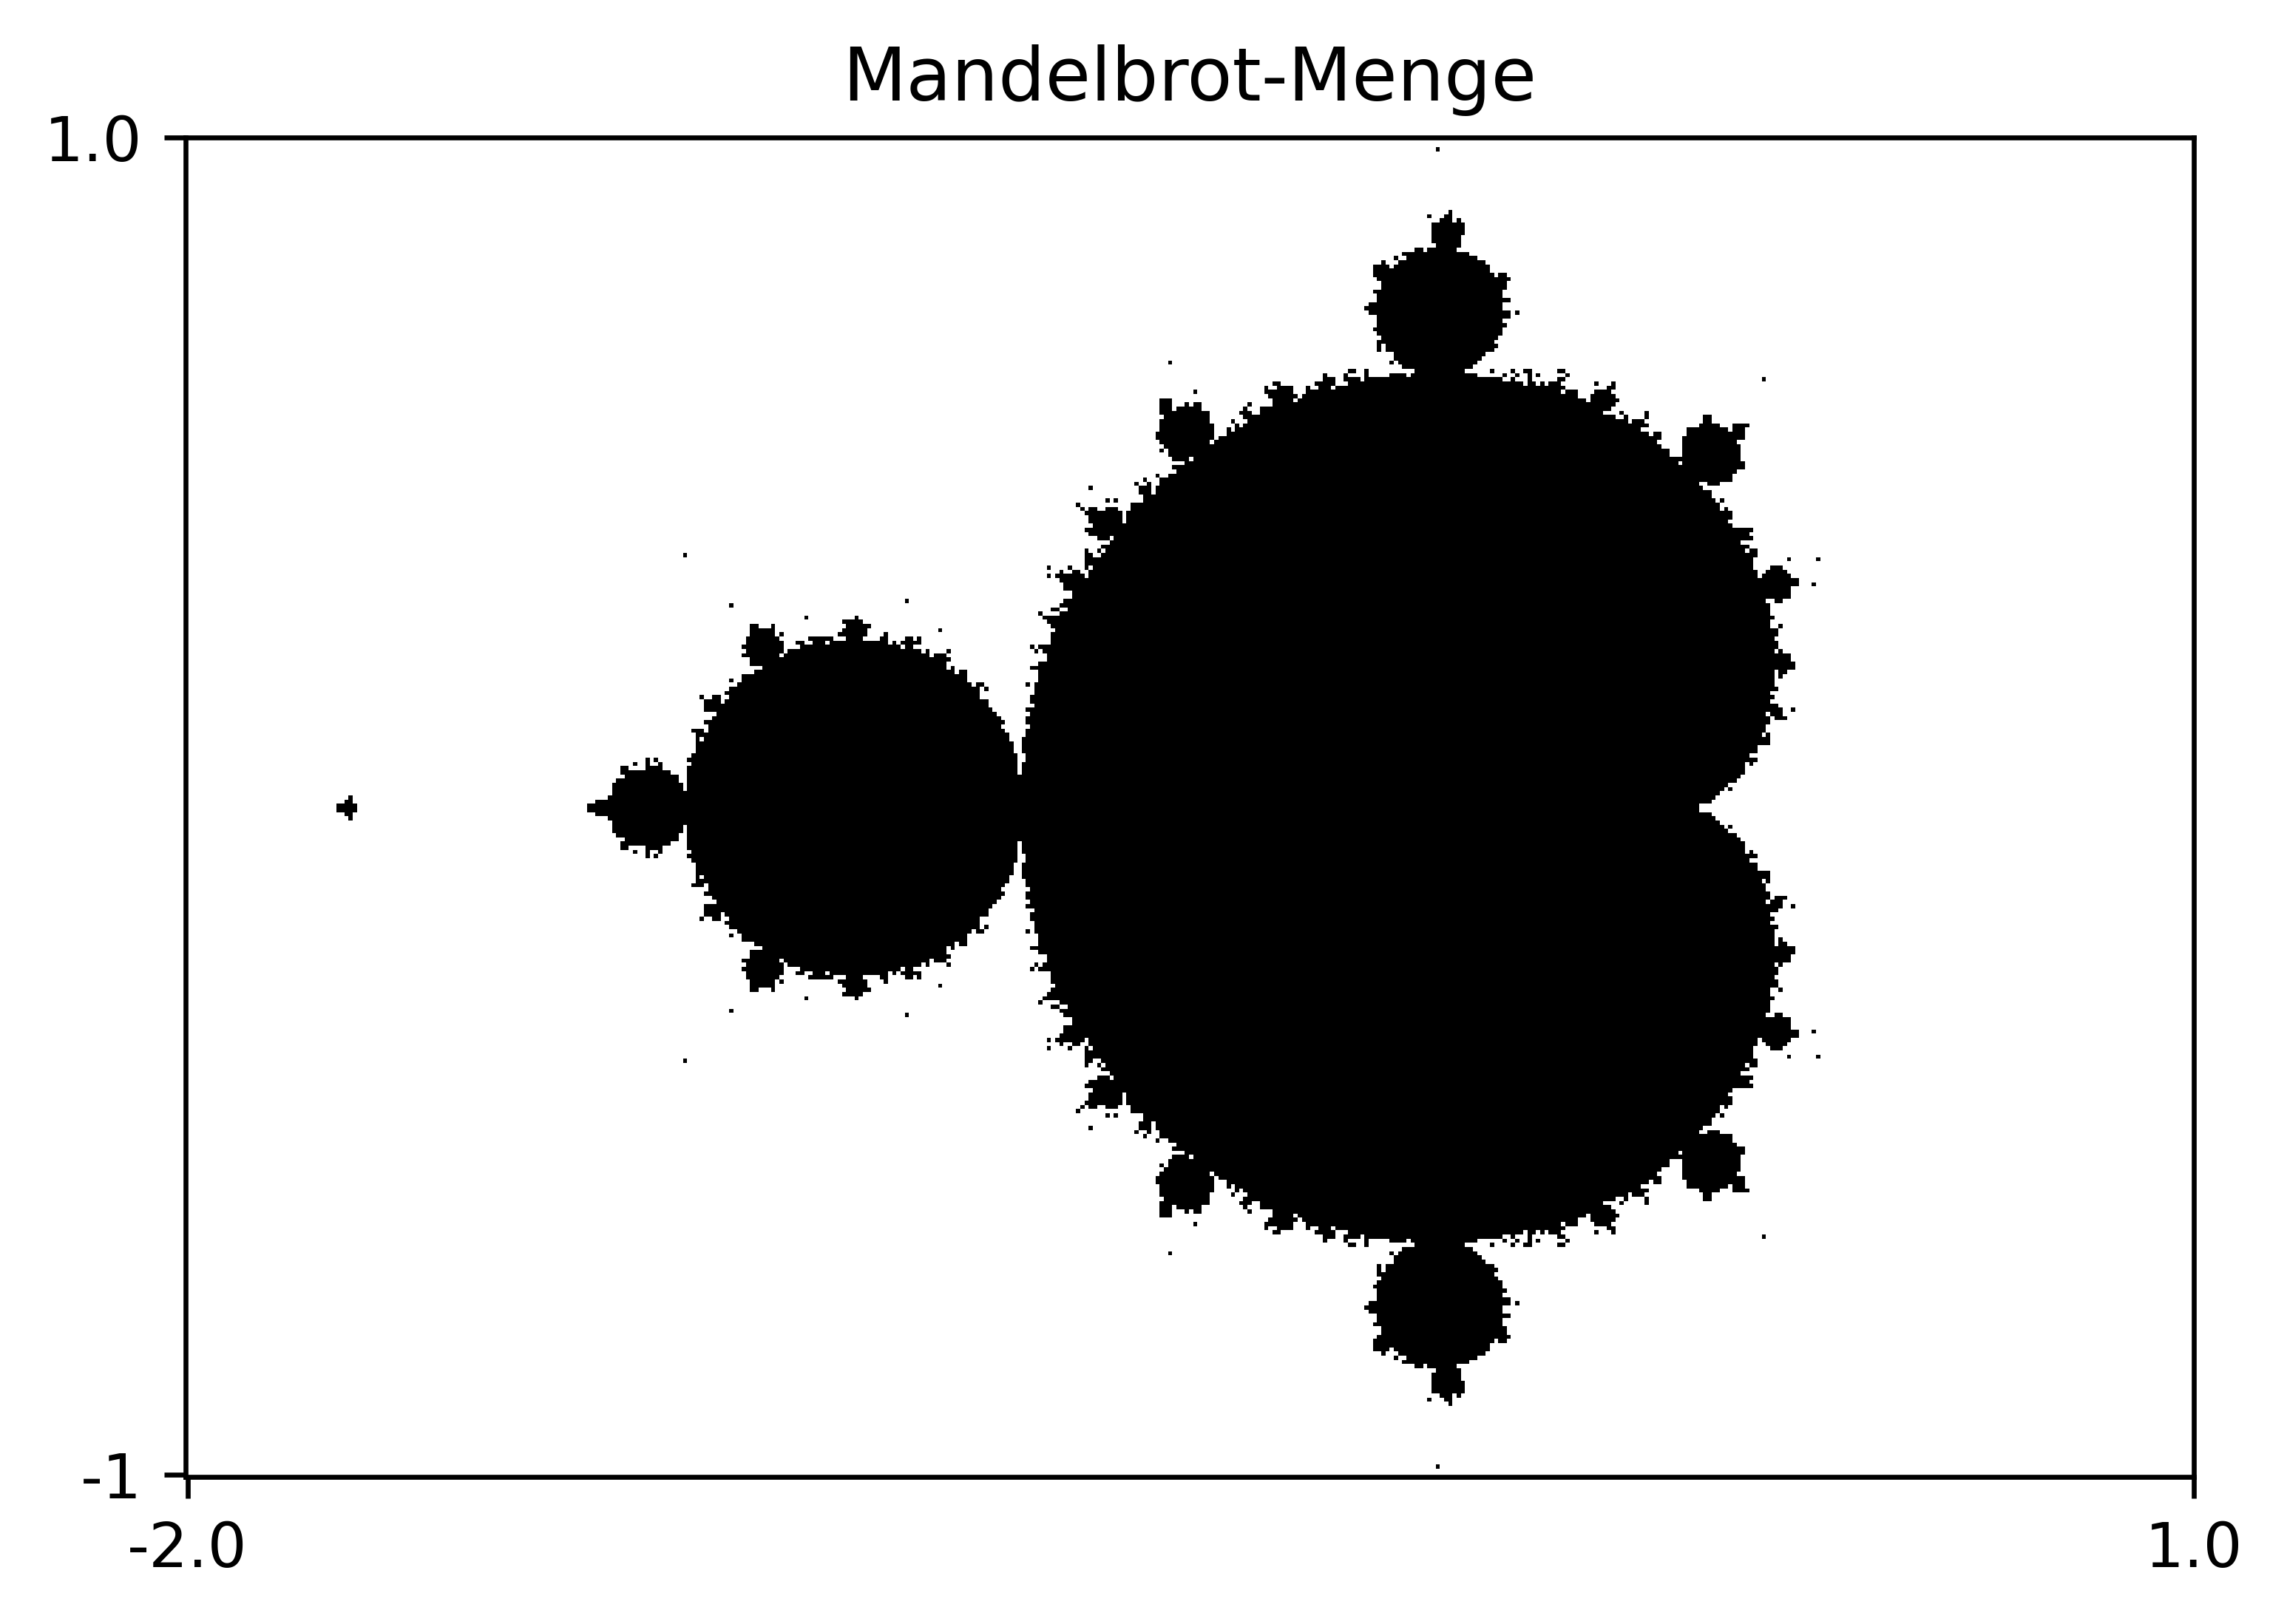

In [3]:
for i in range(n):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > divBarrier] = False

# flip M (change black and white)
M = np.logical_not(M)

plt.figure(dpi=600)
plt.imshow(M, cmap=cm.gray, origin='lower')
plt.xlabel('')
plt.ylabel('')
plt.xticks(np.arange(0.0, 481.0, 480.0), (xmin, xmax))
plt.yticks(np.arange(0.0, 321.0, 320.0), (ymin, ymax))
plt.title('Mandelbrot-Menge')